In [11]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True
sns.set()

In [12]:
# parentDir=os.path.join("Metrics", "noHeadMoreCSBW")
parentDir=os.path.join("Metrics", "sleep")

In [13]:
df = pd.read_csv(os.path.join(parentDir, 'collectedMetrics.csv'))
df = df.groupby(["nCPUs", "expN"], as_index=False).mean()

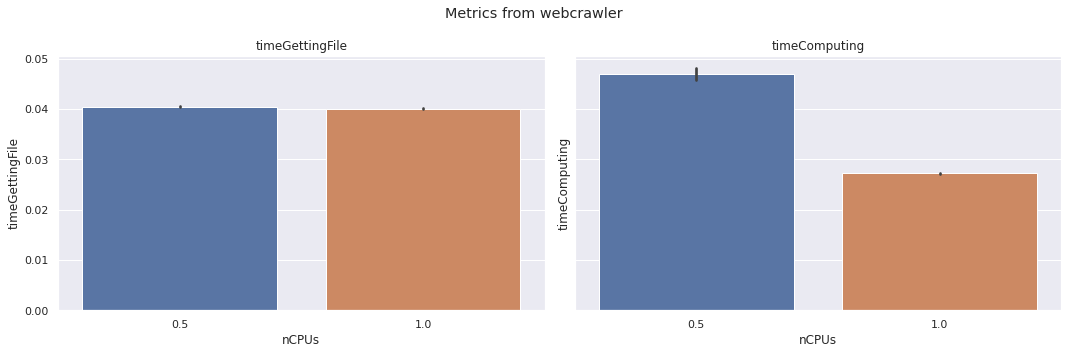

In [14]:
interestedCollumns = ["timeGettingFile", "timeComputing"]
fig, axes = plt.subplots(1, len(interestedCollumns), figsize=(15,5), sharey=True)
fig.suptitle('Metrics from webcrawler')

for i, collumnTitle in enumerate(interestedCollumns):
    sns.barplot(ax=axes[i], x="nCPUs", y=collumnTitle, data=df)
    axes[i].set_title(collumnTitle)

Text(0, 0.5, 'Time Getting File %')

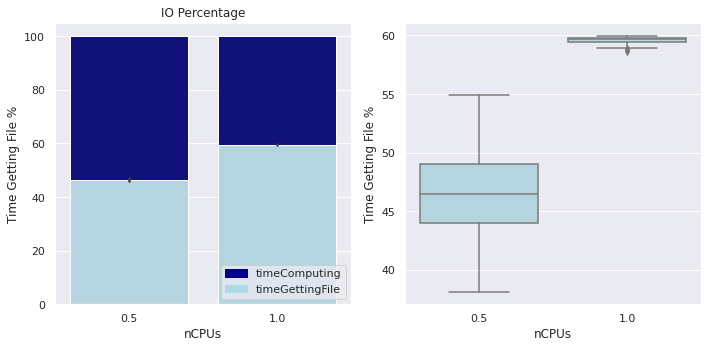

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# from raw value to percentage
percentDF = pd.DataFrame()
percentDF = df[['nCPUs', 'timeGettingFile', 'timeComputing']].copy()
percentDF["totalTime"] = df["timeGettingFile"] + df["timeComputing"]
percentDF["timeGettingFilePercent"] = df["timeGettingFile"] / percentDF["totalTime"] * 100
percentDF["total"] = 100

ax=axes[0]
bar1 = sns.barplot(x="nCPUs", y="total", data=percentDF, color='darkblue', ax=ax)
bar2 = sns.barplot(x="nCPUs", y="timeGettingFilePercent", data=percentDF, color='lightblue', ax=ax)

ax.set_title('IO Percentage')
ax.set_ylabel('Time Getting File %')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='timeComputing')
bottom_bar = mpatches.Patch(color='lightblue', label='timeGettingFile')
ax.legend(handles=[top_bar, bottom_bar], loc="lower right")

ax=axes[1]
sns.boxplot(ax=ax, x="nCPUs", y="timeGettingFilePercent", color='lightblue', data=percentDF)
ax.set_ylabel('Time Getting File %')

In [16]:
percentDF.groupby(["nCPUs"]).mean()

,timeGettingFile,timeComputing,totalTime,timeGettingFilePercent,total
nCPUs,,,,,
0.5,0.040480,0.047047,0.087527,46.492340,100.0
1.0,0.040085,0.027194,0.067280,59.581568,100.0


In [17]:
totalExDF = pd.read_csv(os.path.join(parentDir, 'execTime.csv'))
totalExDF = totalExDF.groupby(["nCPUs", "expN"], as_index=False).mean()

<AxesSubplot:xlabel='expN', ylabel='Execution Time'>

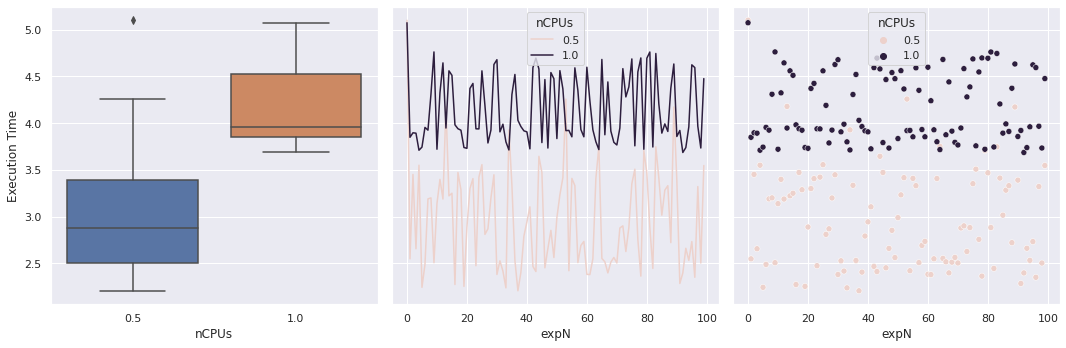

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
ax=axes[0]
# ax.set_ylim(ymin=0)
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDF, ax=ax)
ax=axes[1]
sns.lineplot(x="expN", y="Execution Time", hue="nCPUs", data=totalExDF, ax=ax)
ax=axes[2]
sns.scatterplot(x="expN", y="Execution Time", hue="nCPUs", data=totalExDF, ax=ax)


<AxesSubplot:xlabel='nCPUs', ylabel='Execution Time'>

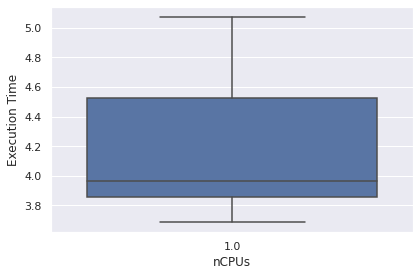

In [19]:
totalExDFFiltered = totalExDF.loc[totalExDF['nCPUs'] != 0.5]
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDFFiltered)

In [20]:
totalExDF.groupby(["nCPUs"]).mean()

,expN,Execution Time
nCPUs,,
0.5,49.5,2.970680
1.0,49.5,4.153099
